In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans, dbscan
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.figure import Figure

# Descomentar no final
import warnings
warnings.filterwarnings('ignore')

### Metodos auxiliares

In [2]:
columns = ["ID", "ACC_X", "ACC_Y", "ACC_Z", "GYRO_X", "GYRO_Y", "GYRO_Z", "MAG_X", "MAG_Y", "MAG_Z", "TIMESTAMP", "ACT_LABEL"] 
part = "0"
dev = "1"

<h1>Import Data</h1>

In [3]:
my_data = np.genfromtxt('FORTH_TRACE_DATASET/part' + part + '/part' + part + 'dev' + dev + '.csv', delimiter=',')
data = pd.DataFrame(my_data, columns=columns)
data

,ID,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,MAG_X,MAG_Y,MAG_Z,TIMESTAMP,ACT_LABEL
0,1.0,-1.8650,9.3890,2.5812,-1.14180,-1.185600,0.849980,-0.34476,0.59839,1.01340,505.89,1.0
1,1.0,-1.7963,9.3742,2.4460,-1.56180,-0.661650,0.597300,-0.34274,0.57631,1.00000,525.42,1.0
2,1.0,-1.8696,9.3000,2.3514,-1.18770,-1.284100,0.142120,-0.34476,0.59639,1.01560,544.95,1.0
3,1.0,-1.7961,9.3624,2.4584,-0.58399,-2.033400,0.429120,-0.32863,0.62249,1.01560,564.48,1.0
4,1.0,-1.6768,9.3506,2.4685,-0.37050,-1.364700,0.371940,-0.33669,0.62048,1.02450,584.01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53115,1.0,-2.2033,9.3479,2.3327,-1.50120,-0.092005,-0.117810,0.22581,0.87751,0.53898,1037900.00,1.0
53116,1.0,-2.1798,9.3235,2.3205,-1.59020,-0.091795,-0.007825,0.21169,0.89759,0.53898,1037900.00,1.0
53117,1.0,-2.1324,9.3112,2.3076,-1.69930,-0.379580,0.132570,0.22379,0.90361,0.54343,1037900.00,1.0
53118,1.0,-2.1327,9.3110,2.2955,-1.55450,-0.241180,0.180670,0.22782,0.89558,0.55234,1038000.00,1.0


<h1>Ex 3.1</h1>

In [4]:
activities = [i + 1 for i in range(16)]
activities_labels = ["palha", "Stand", "Sit", "Sit and Talk", "Walk", "Walk and Talk", "Climb Stair", "Climb Stair and Talk", "Stand to Sit", "Sit to Stand", "Stand to Sit and Talk", "Sit to Stand and Talk", "Stand to Walk", "Walk to Stand", "Stand to Climb Stairs / Stand to Climb Stairs and Talk", "Climb Stairs to Walk", "Climb Stairs and Talk to Walk and Talk"]
sensors = ['ACC', 'GYRO', 'MAG']

In [5]:
def return_activity(data, act):
    return data[data["ACT_LABEL"] == act]

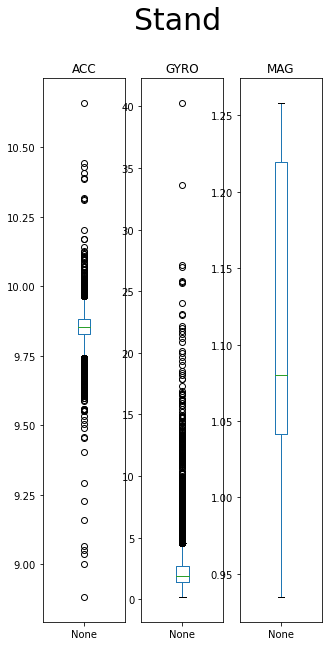

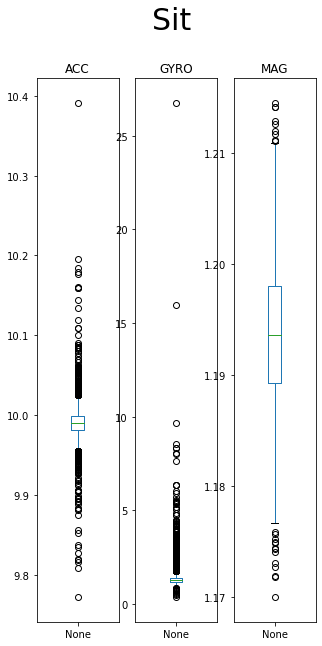

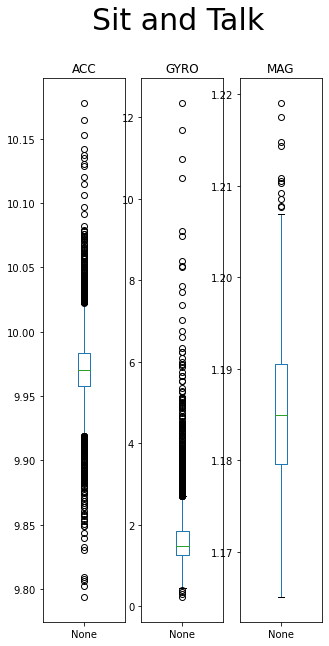

In [6]:
transformed_data = {}
max_activities_to_plot = 3
to_plot = True
contador = 0
for act in activities:
    modulo = return_activity(data,act)
    ACC_BOX_PLOT = np.sqrt(pow(modulo["ACC_X"], 2) + pow(modulo["ACC_Y"], 2) + pow(modulo["ACC_Z"], 2))
    GYRO_BOX_PLOT = np.sqrt(pow(modulo["GYRO_X"], 2) + pow(modulo["GYRO_Y"], 2) + pow(modulo["GYRO_Z"], 2))
    MAG_BOX_PLOT = np.sqrt(pow(modulo["MAG_X"], 2) + pow(modulo["MAG_Y"], 2) + pow(modulo["MAG_Z"], 2))
    frame = {'ACC': ACC_BOX_PLOT, 'GYRO': GYRO_BOX_PLOT,'MAG': MAG_BOX_PLOT}
    join_series = pd.DataFrame(frame)
    transformed_data[activities_labels[act]] = join_series
  
    if to_plot:
        fig,ax = plt.subplots(1,3)
        fig.suptitle(activities_labels[act], fontsize=30)
    
        plt.subplot(131)
        plt.title("ACC")
        ACC_BOX_PLOT.plot.box(figsize = (5,10))
       
        plt.subplot(132)
        plt.title("GYRO")
        GYRO_BOX_PLOT.plot.box(figsize = (5,10))
    
        plt.subplot(133)
        plt.title("MAG")
        MAG_BOX_PLOT.plot.box(figsize = (5,10))
    
        if contador == max_activities_to_plot - 1:
            to_plot = False
        
        contador += 1

# Ex 3.2


In [7]:
def density(data, nr, k):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    ul = k * IQR + Q3
    ll = -k * IQR + Q1
    n0 = len(data[(data > ul) | (data < ll)])
    return float(n0) / float(nr) * 100.0

In [8]:
k = 1.5
nr = len(transformed_data["Stand"]['MAG'])

density_dataFrame = pd.DataFrame(columns=["Activity", "Sensor", "Density"])
for act in activities_labels[1:]:
    for sen in sensors:
        new_row = pd.Series(data={'Activity': act, 'Sensor': sen, 'Density': density(transformed_data[act][sen], nr, k)})
        density_dataFrame = density_dataFrame.append(new_row, ignore_index=True)
        
density_dataFrame

,Activity,Sensor,Density
0,Stand,ACC,3.496186
1,Stand,GYRO,7.618961
2,Stand,MAG,0.000000
3,Sit,ACC,2.070469
4,Sit,GYRO,3.995641
5,Sit,MAG,0.199782
6,Sit and Talk,ACC,2.860516
7,Sit and Talk,GYRO,2.996731
8,Sit and Talk,MAG,0.099891
9,Walk,ACC,2.097712


## Análise da densidade
<p>A tabela mostra-nos a densidade de outliers para cada atividade e sensor</p>

- No gráfico abaixo, conluimos que a atividade "Stand" é a que tem maior densidade de outliers e a "Climb Strairs to Walk and Talk" é a que tem menor densidade de outliers

- No último gráfico, concluimos que o sensor de Magnómetro é o que tem menor densidade de outliers, relativamente aos outros 2 sensores

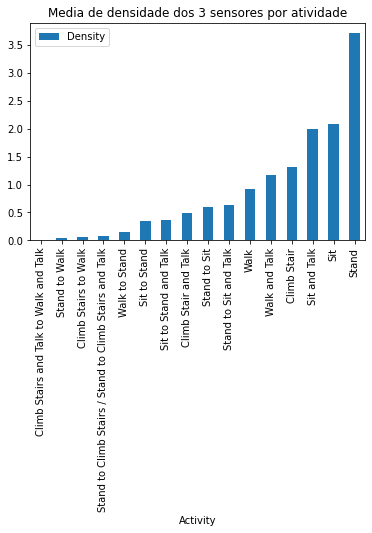

In [9]:
density_dataFrame.groupby("Activity").mean().sort_values("Density").plot(kind="bar")
plt.title("Media de densidade dos 3 sensores por atividade")
plt.show()

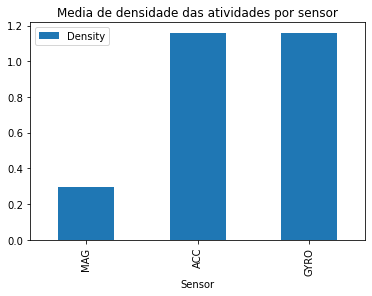

In [10]:
density_dataFrame.groupby("Sensor").mean().sort_values("Density").plot(kind="bar")
plt.title("Media de densidade das atividades por sensor")
plt.show()

# Ex 3.3

In [31]:
# Retorna os valores dos outliers do Z-score

def z_score(data, k):
    mean = data.mean()
    std = data.std()
    z_score = abs((data - mean) / std)
    return data[z_score < k], data[z_score >= k]

# Ex 3.4
## Z-Score - Visualização

In [32]:
# Função para traçar os gráficos do Z-score dado o valor de k, separados por ações e sensores

def graficos_z_score(label, act, transformed_data, density_dataFrame, toPlot, k):
    normal_data, outlier = z_score(transformed_data[act][label], k)
    if toPlot:
        plt.title(act + " / " + label + " Z-Score - " + str(k))
        plt.plot(np.zeros_like(normal_data), normal_data, 'o', color="blue")
        plt.plot(np.zeros_like(outlier), outlier, 'x', color="red")
    density_dataFrame.loc[(density_dataFrame["Activity"] == act) & (density_dataFrame["Sensor"] == label), "Z-Score Density_" + str(k)] = len(outlier) / (len(outlier) + len(normal_data)) * 100

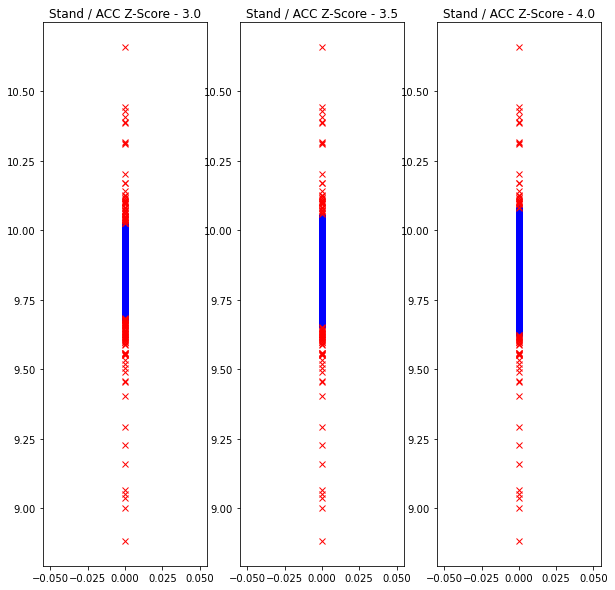

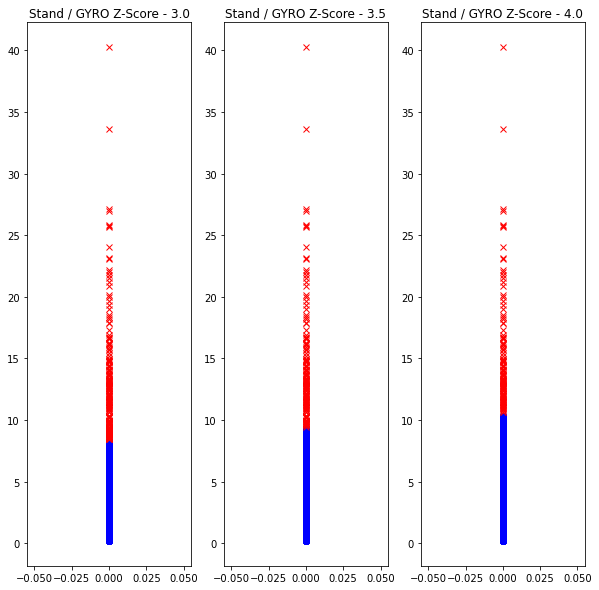

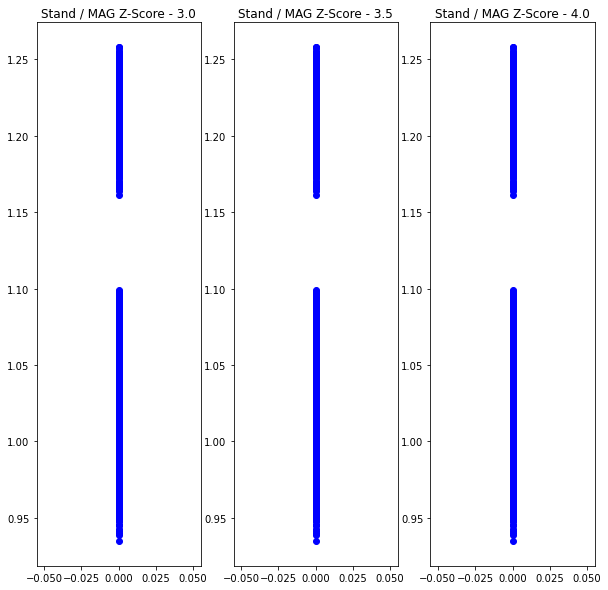

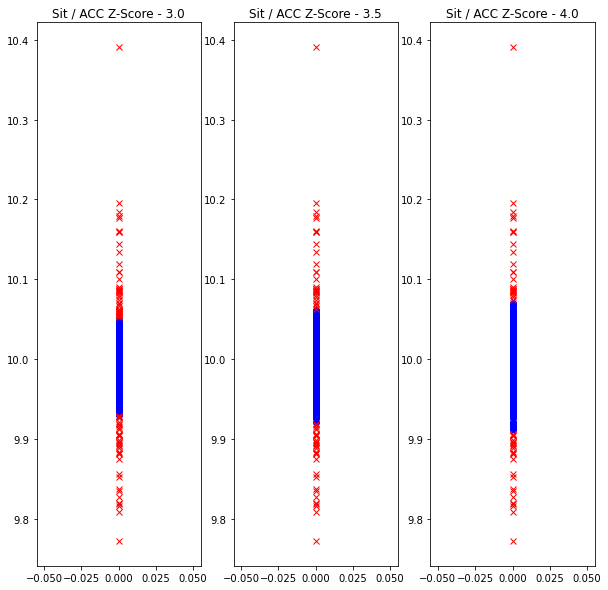

In [14]:
%matplotlib inline

density_dataFrame.rename(columns={'Density': 'Density_Q'}, inplace=True) 
how_many_plots_times_3 = 4 
show_plot = True
i = 0
for k in np.linspace(3,4,3):
    density_dataFrame["Z-Score Density_"+str(k)] = np.nan
for act in activities_labels[1:]: 
    for sen in sensors:
       
        if i+1 > how_many_plots_times_3:
            show_plot = False
        if show_plot:
            fig,ax = plt.subplots(1,3,figsize=(10,10))       
            plt.subplot(131)    
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot, 3.0)
        
        if show_plot:
            plt.subplot(132)
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot, 3.5)
        
        if show_plot:
            plt.subplot(133)
        graficos_z_score(sen,act ,transformed_data,density_dataFrame,show_plot, 4.0)
        i+=1

# Ex 3.5

## Comparar os resultados do 3.1 com o 3.4
<p>Nos gráficos e tabelas abaixo, concluimos que a densidade de outliers pelos quartis é bastante superior em todos os sensores nas atividades de "Stand", "Sit", "Sit and Talk", "Walk"," Walk and Talk" e "Climb Stair". Depois nas restantes, o Z-Score de k=3 já tem maior densidade de outliers. Chegando a haver atividade como "Stand to Climb Stairs / Stand to Climb Stairs" em que a densidade calculada pelos quartis é inferior de todos os Z-Scores de k=3 até k=4.</p>

- Podemos também concluir que quanto maior o valor do k no Z-Score, menor vai ser a densidade de outliers do sinal

In [15]:
density_dataFrame

,Activity,Sensor,Density_Q,Z-Score Density_3.0,Z-Score Density_3.5,Z-Score Density_4.0
0,Stand,ACC,3.496186,1.044315,0.744642,0.581184
1,Stand,GYRO,7.618961,1.888849,1.443879,1.162368
2,Stand,MAG,0.000000,0.000000,0.000000,0.000000
3,Sit,ACC,2.070469,1.458333,1.076389,0.920139
4,Sit,GYRO,3.995641,1.163194,0.972222,0.833333
5,Sit,MAG,0.199782,0.243056,0.034722,0.000000
6,Sit and Talk,ACC,2.860516,1.927083,1.111111,0.659722
7,Sit and Talk,GYRO,2.996731,1.649306,1.250000,0.885417
8,Sit and Talk,MAG,0.099891,0.156250,0.069444,0.034722
9,Walk,ACC,2.097712,0.715072,0.242024,0.033003


In [16]:
# Simplesmente para ajudar no x label dos plots
density_dataFrame["x_label_aux"] = density_dataFrame["Activity"] + " - " + density_dataFrame["Sensor"]

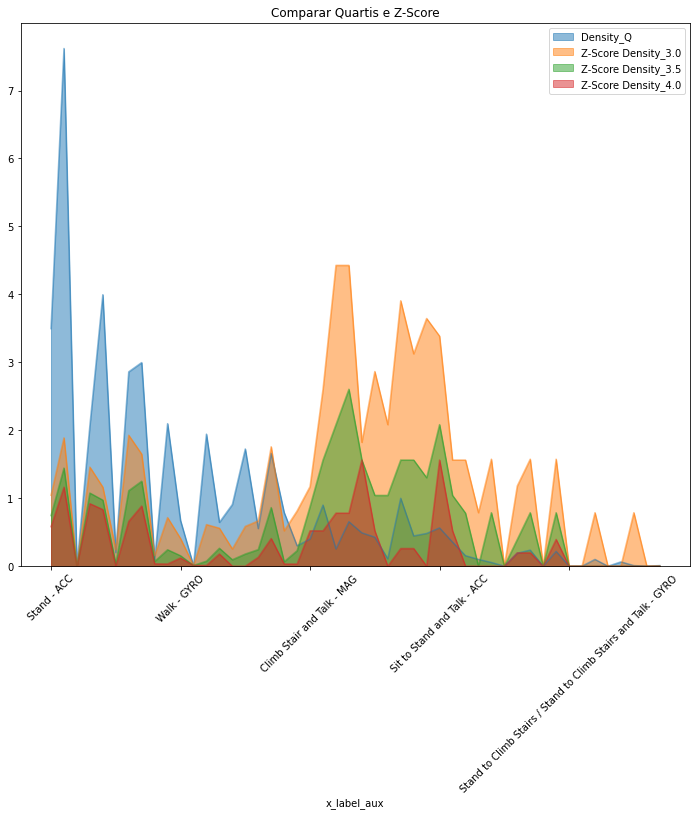

In [17]:
density_dataFrame.plot.area(figsize=(12, 10), stacked=False, x="x_label_aux")
plt.title("Comparar Quartis e Z-Score")
plt.xticks(rotation=45)
plt.show()

## Comparar os Z-Scores entre si
<p>Pelo gráfico em cima podemos concluir o que já seria de esperar, que é: quando maior o K do Z-Score, menor a densidade de outliers. Uma vez que estamos a aumentar a distância à origem da distribuição Gaussina em que consideramos que os pontos não são ouliers, como podemos ver na imagem em baixo.</p>
<img src="z-score.png" width=600 height=600 />


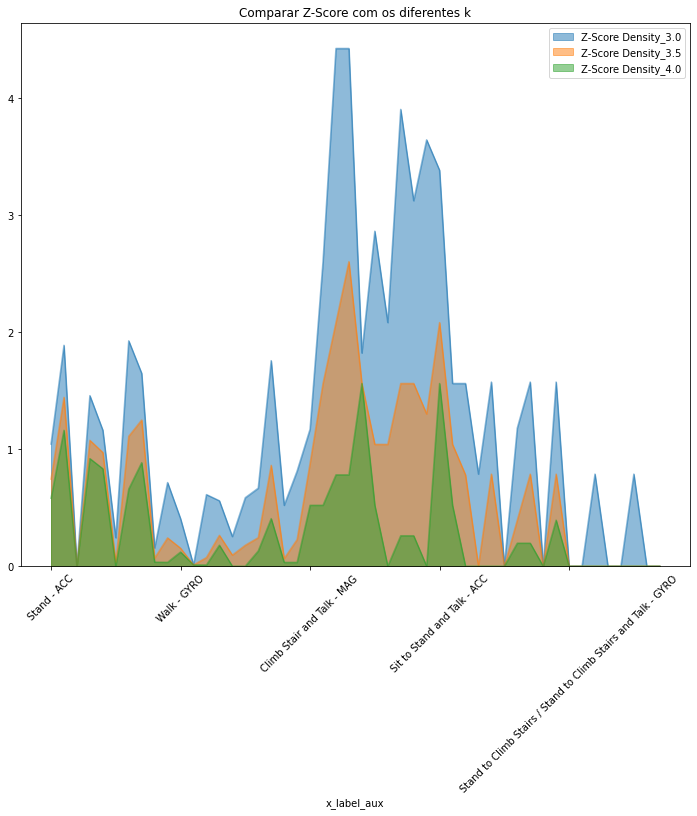

In [18]:
density_dataFrame[['x_label_aux', 'Z-Score Density_3.0', 'Z-Score Density_3.5', 'Z-Score Density_4.0']].plot.area(figsize=(12, 10), stacked=False, x="x_label_aux")
plt.title("Comparar Z-Score com os diferentes k")
plt.xticks(rotation=45)
plt.show()

# Ex 3.6

In [19]:
# Implementação feita por nós

def k_means_by_us(data, n_clusters, max_iterations, sensor):
    # Calcula a distância entre os pontos aos centros dos clusters
    def calculate_distance(data,centroids):   
        data_2_manipulate = data[data.columns[:-1]].values
        all_clusters = []
        for index,row in enumerate(data_2_manipulate):
            distance = [np.linalg.norm(row - centroid) for centroid in centroids]
            cluster = distance.index(min(distance))
            all_clusters.append(cluster)
        data["centroids"] = all_clusters            
        return data
    
    # Atualiza o centro dos clusters
    def centroids_new_positions(data, n_clusters):
        return [data[data["centroids"] == i].mean().values[:-1] for i in range(n_clusters)]
    
    # Recursividade
    def recursive_kMeans(data, n_clusters, max_iterations, curr_iteration, list_clusters):
        prev_list_clusters = list_clusters
        data = calculate_distance(data, list_clusters)
        list_clusters = centroids_new_positions(data, n_clusters)
        if str(prev_list_clusters) == str(list_clusters) or curr_iteration > max_iterations:
            return data
        return recursive_kMeans(data, n_clusters, max_iterations, curr_iteration + 1, list_clusters)
    
    # Preparar dados para o algoritmo
    data["centroids"] = -1
    clusters_start_index = random.choices(data.index, k=n_clusters)
    list_clusters = []
    for clust in clusters_start_index:
        coordinates = np.array([data.loc[clust][sensor + "_X"], data.loc[clust][sensor + "_Y"], data.loc[clust][sensor + "_Z"]])
        list_clusters.append(coordinates)
    
        
    return recursive_kMeans(data, n_clusters, max_iterations, 0, list_clusters)["centroids"]

# Ex 3.7

In [34]:
%matplotlib inline

def calculate_and_show_kmeans(data, max_iter, act, sensor, to_plot):
    def calcula_melhor_n_cluster(act, sensor):
        n_clusters = range(1, 9)
        km = [KMeans(n_clusters=i) for i in n_clusters]
        data_to_clusterise = data[data["ACT_LABEL"] == act][[sensor + "_X", sensor + "_Y", sensor + "_Z"]]
        score = [km[i].fit(data_to_clusterise).score(data_to_clusterise) for i in range(len(km))]
        
        # Reta
        aux_x = [n_clusters[0], n_clusters[-1]]
        aux_y = [score[0], score[-1]]

        a = score[0] - score[-1]
        b = n_clusters[-1] - n_clusters[0]
        c1 = n_clusters[0] * score[-1]
        c2 = n_clusters[-1] * score[0]
        c = c1 - c2

        # Valores das distancias da reta a curvinha
        dists_reta = [calculate_distance(n, score[n - 1], a, b, c) for n in n_clusters]
        return dists_reta.index(max(dists_reta)) + 1
    
    # https://www.youtube.com/watch?v=IEBsrUQ4eMc
    def calculate_distance(x, y, a, b, c):
        return abs((a * x + b * y + c)) / (np.sqrt(a * a + b * b))
    
    def z_score_return_outliers(data, k):
        data = data.to_frame()
        mean = data.mean()
        std = data.std()
        z_score = abs((data - mean) / std)
        data["z_score"] = z_score
        return data[data["z_score"] >= k].index
    
    data_to_clusterise = data[data["ACT_LABEL"] == act][[sensor + "_X", sensor + "_Y", sensor + "_Z"]]  # Preparação dos dados para fazer o K-means
    data_to_clusterise["clusters"] = k_means_by_us(data_to_clusterise, calcula_melhor_n_cluster(act, sensor), max_iter, sensor)  # Guardar os resultados do K-means numa tabela
    
    size = data_to_clusterise.shape[0]
    threshold = 0.05    
    show_df = pd.DataFrame(columns=["N Pontos", "Percentagem"])
    show_df["N Pontos"] = data_to_clusterise.groupby("clusters").count().centroids
    show_df["Percentagem"] =  show_df["N Pontos"] / size
    print(show_df)
    
    for i, size_cluster in enumerate(data_to_clusterise.groupby("clusters").count().centroids.values):
        if threshold > size_cluster/size:
            print("Cluster "+str(i) + " is an outlier!")
            indexes_outliers_clusters = data_to_clusterise[data_to_clusterise["clusters"] == i].index
            indexes_outliers_zscore = z_score_return_outliers(transformed_data[activities_labels[act]][sensor], 3)
            plt.figure(figsize=(3, 10))
            plt.title("Comparação outliers entre cluster e Z-Score")
            plt.scatter(np.zeros_like(indexes_outliers_clusters), indexes_outliers_clusters, color="red", label="Cluster")
            plt.scatter(np.ones_like(indexes_outliers_zscore), indexes_outliers_zscore, color="green", label="Z-Score(k = 3)")
            plt.legend()
            plt.show()
        else:
            print("Cluster "+str(i) + " is NOT an outlier!")
            
    if to_plot:
        fig = plt.figure(figsize=(8, 6)).gca(projection='3d')
        plt.title(activities_labels[act] + " / " + sensor)
        if sensor == "ACC":
            fig.scatter(data_to_clusterise.ACC_X, data_to_clusterise.ACC_Y, data_to_clusterise.ACC_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('ACC_X')
            fig.set_ylabel('ACC_Y')
            fig.set_zlabel('ACC_Z')
        elif sensor == "GYRO":
            fig.scatter(data_to_clusterise.GYRO_X, data_to_clusterise.GYRO_Y, data_to_clusterise.GYRO_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('GYRO_X')
            fig.set_ylabel('GYRO_Y')
            fig.set_zlabel('GYRO_Z')
        elif sensor == "MAG":
            fig.scatter(data_to_clusterise.MAG_X, data_to_clusterise.MAG_Y, data_to_clusterise.MAG_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('MAG_X')
            fig.set_ylabel('MAG_Y')
            fig.set_zlabel('MAG_Z')
        plt.show()


          N Pontos  Percentagem
clusters                       
0             2483     0.225481
1             2770     0.251544
2             5759     0.522975
Cluster 0 is NOT an outlier!
Cluster 1 is NOT an outlier!
Cluster 2 is NOT an outlier!


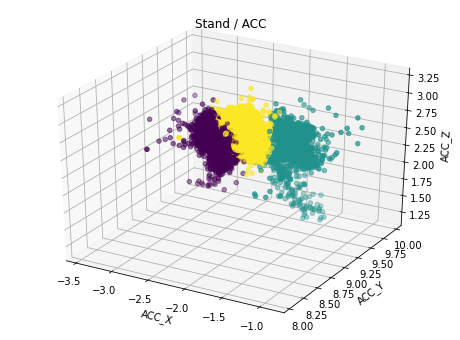

          N Pontos  Percentagem
clusters                       
0              240     0.021794
1             5843     0.530603
2             4929     0.447603
Cluster 0 is an outlier!


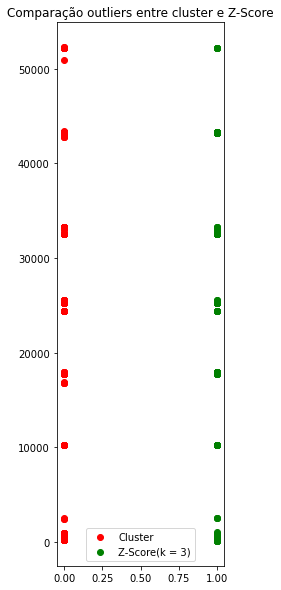

Cluster 1 is NOT an outlier!
Cluster 2 is NOT an outlier!


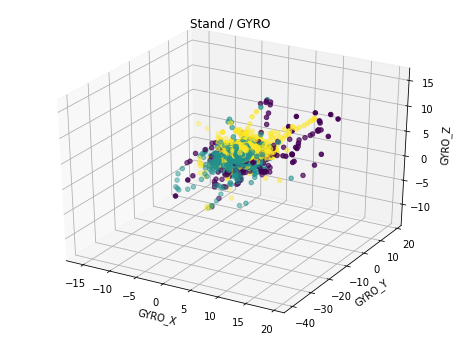

          N Pontos  Percentagem
clusters                       
0             4864     0.441700
1             2561     0.232564
2             3587     0.325736
Cluster 0 is NOT an outlier!
Cluster 1 is NOT an outlier!
Cluster 2 is NOT an outlier!


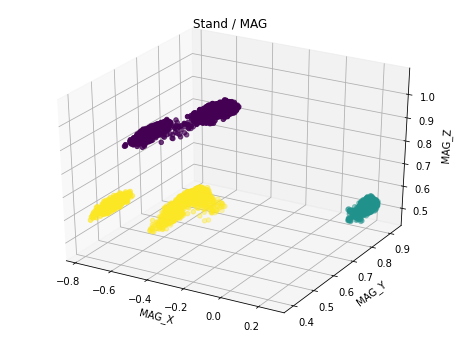

In [35]:
# Feito com o nosso kmeans
%matplotlib inline

max_iter = 100
to_plot = True
max_act_to_plot = 1
contador = 0
for act in activities:
    calculate_and_show_kmeans(data, max_iter, act, "ACC", to_plot)
    calculate_and_show_kmeans(data, max_iter, act, "GYRO", to_plot)
    calculate_and_show_kmeans(data, max_iter, act, "MAG", to_plot)
    if contador == max_act_to_plot - 1:
        break
    contador += 1

## K-means vs. Z-score
<p>Para cada uma das atividadades e sensores, testamos vários valores de número de clusters, sendo que os que aparecem nos gráficos são os que são os melhores valores (utilizando o <b>método do cotovelo</b>).</p>
<p>Relativamente aos outliers nos clusters, estes são definidos como outliers se o número de pontos no dado cluster for inferior a um threshold estipulado (5% do total de pontos em análise). No caso de isso acontecer, todos os pontos desse dado cluster serão considerados outliers.</p>
<p>Fazemos a comparação graficamente entre o K-means e o Z-score no caso de o cluster ser inferior ao dado threshold e, de um modo geral, nunca conseguimos concluir nenhum resultado em concreto, pois estamos a considerar valores fixos (Z-score com k = 3 e threshold de 5%), sendo que por vezes o K-means deteta mais outliers que o Z-score e outras vezes o contrário.</p>

# Ex 3.7.1 - extra
# Algoritmo DBSCAN

In [22]:
def calculate_and_show_dbscan(data, eps, min_samples, sensor, act, to_plot):
    data_to_clusterise = data[data["ACT_LABEL"] == act][[sensor + "_X", sensor + "_Y", sensor + "_Z"]]
    data_to_clusterise["clusters"] = dbscan(data_to_clusterise, eps=eps, min_samples=min_samples)[1]
    
    if to_plot:
        fig = plt.figure(figsize=(8, 6)).gca(projection='3d')
        plt.title(activities_labels[act] + " / " + sensor)
        if sensor == "ACC":
            fig.scatter(data_to_clusterise.ACC_X, data_to_clusterise.ACC_Y, data_to_clusterise.ACC_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('ACC_X')
            fig.set_ylabel('ACC_Y')
            fig.set_zlabel('ACC_Z')
        elif sensor == "GYRO":
            fig.scatter(data_to_clusterise.GYRO_X, data_to_clusterise.GYRO_Y, data_to_clusterise.GYRO_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('GYRO_X')
            fig.set_ylabel('GYRO_Y')
            fig.set_zlabel('GYRO_Z')
        elif sensor == "MAG":
            fig.scatter(data_to_clusterise.MAG_X, data_to_clusterise.MAG_Y, data_to_clusterise.MAG_Z, c=data_to_clusterise.clusters)
            fig.set_xlabel('MAG_X')
            fig.set_ylabel('MAG_Y')
            fig.set_zlabel('MAG_Z')
        plt.show()

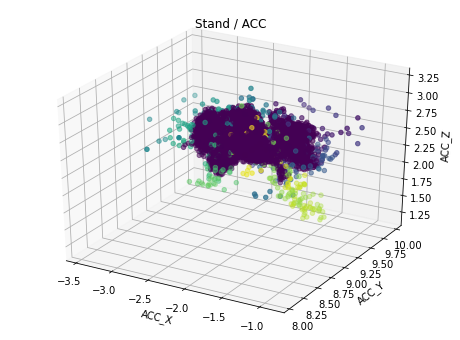

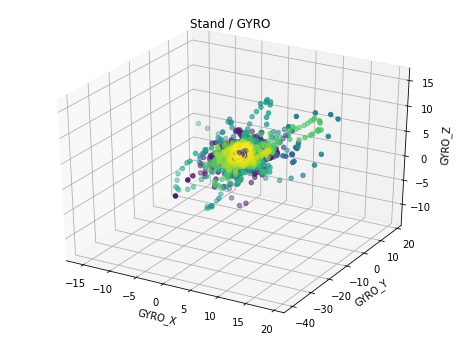

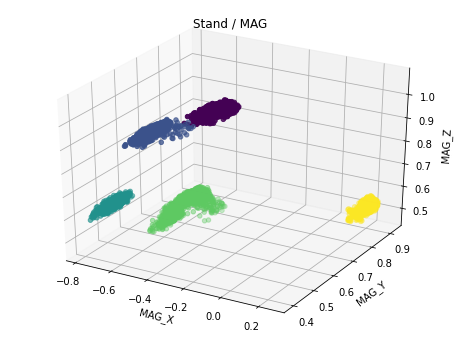

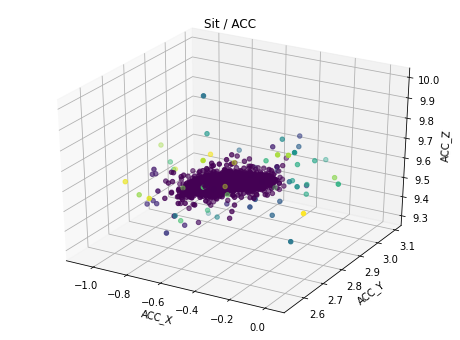

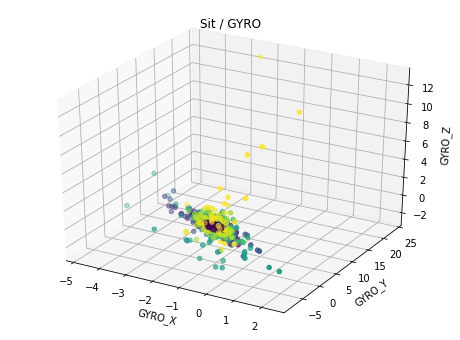

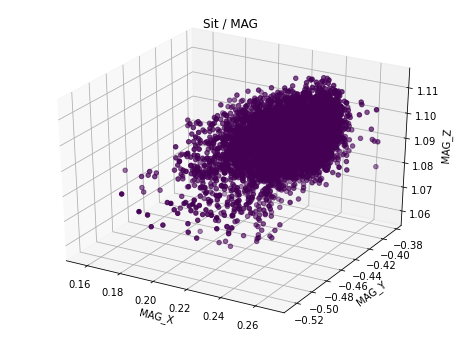

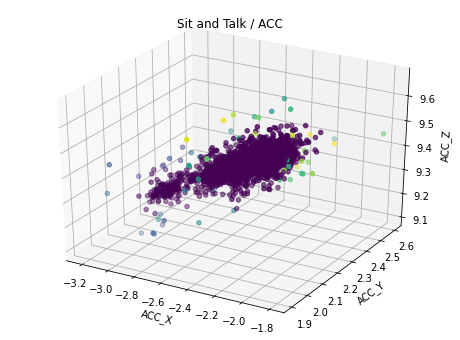

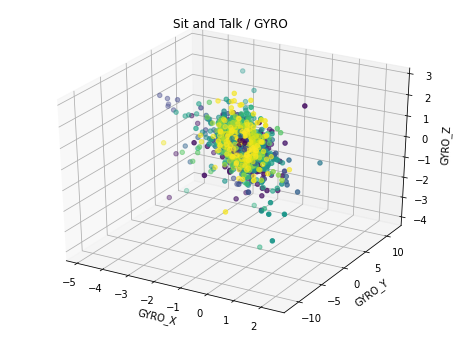

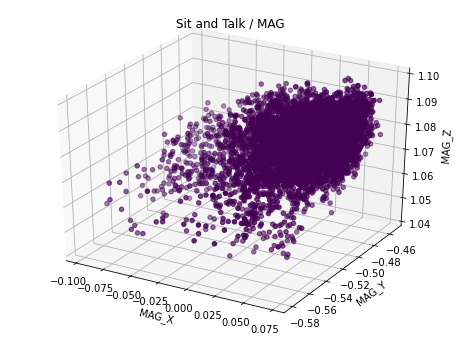

In [23]:
%matplotlib inline

upper_limits_n_clusters = 5
n_clusters = 9
eps = 0.05
min_samples = 1
to_plot = True
max_act_to_plot = 3
contador = 0
for act in activities:
    calculate_and_show_dbscan(data, eps, min_samples, "ACC", act, to_plot)
    calculate_and_show_dbscan(data, eps, min_samples, "GYRO", act, to_plot)
    calculate_and_show_dbscan(data, eps, min_samples, "MAG", act, to_plot)
    if contador == max_act_to_plot - 1:
        to_plot = False
    contador += 1

## K-means vs. DBSCAN
<p>De um modo geral, o DBSCAN é um melhor algoritmo de clustering, pois não é necessário definir um valor a priori de clusters e suporta formas irregulares de clusters. No entanto, para isso acontecer, é necessário encontrar valores para o Ɛ e o mínimo de pontos para o cluster.<p>

# Ex 3.8
## Injetar outliers

In [37]:
# Calcula a densidade de outliers de acordo com o Z-score

def calculate_density_z_score(data, k):
    nr, no = z_score(data, k)
    nt = len(data)
    density = len(no) / nt * 100.0
    return density

In [40]:
# Injeta outliers num conjunto de dados com base numa percentagem x_per

def injeta_outliers(data, x_per, k, max_iter=20):
    nr, no = z_score(data, k)
    nt = len(data)
    density = len(no) / nt * 100.0
    limite_max = 2
    itera = 0
    while density < x_per and max_iter > itera:
        to_Add = round(len(nr) * (x_per - density) / 100)
        to_replace = random.choices(nr.index, k=to_Add)
        mean = np.mean(data)
        std = np.std(data)
        for elem in to_replace:
            s = [-1,1][random.randrange(2)]
            q = random.random() * (mean + k * std) * limite_max
            nr.loc[elem] = mean + s * k * (std + q)
        data = nr.append(no)
        nr, no = z_score(data, k)
        nt = len(data)
        density = len(no) / nt * 100.0
        itera += 1
    return data

# Ex 3.9


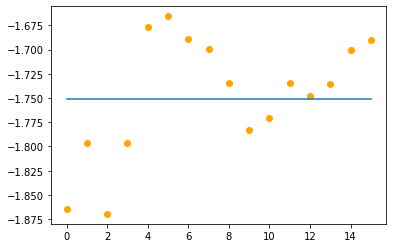

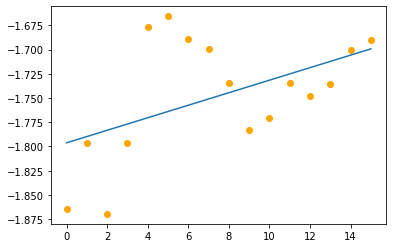

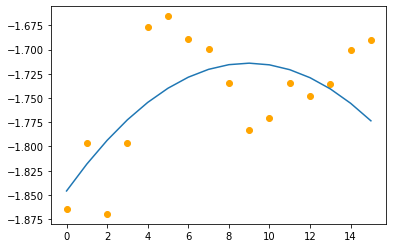

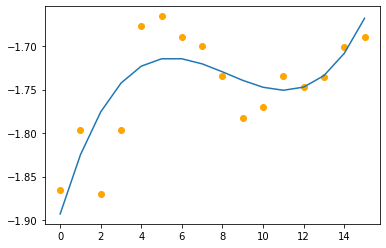

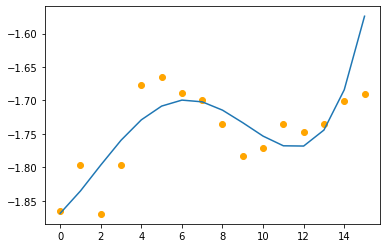

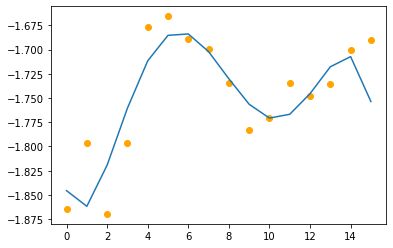

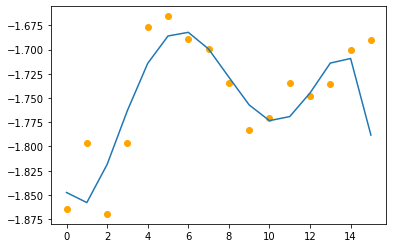

In [39]:
def linearRegressionWithMultipleOrders(dados, janela, order):
    y = dados[:janela]  # Todos os dados menos o outlier
    x = np.arange(0, janela)
    b = np.polyfit(x, y, order)
    x = np.arange(0, janela + 1)
    return sum([b[len(b) - i - 1] * pow(x, i) for i in range(len(b))])  # Valor previsto

dados = data[data["ACT_LABEL"] == activities[0]]["ACC_X"]
for ind in range(7):
    x = np.arange(0, 16)
    y = linearRegressionWithMultipleOrders(dados, 15, ind)
    plt.figure()
    plt.scatter(x, dados[:16], color="orange")
    plt.plot(x, y)
    plt.show()

# 3.10

In [27]:
def faz_otrespontodez(data, data_with_outliers, janela, k_z):
    _, find_outliers = z_score(data_with_outliers, k_z)  # Array dos indices dos outliers
    erros = []  # Menor erro para cada ordem (1 a 6)
    for outlier in find_outliers.index:  # Percorre os indices dos outliers
        if outlier >= janela:  # Indice 3 e janela 10 => apenas verifica estas condições
            train_array = data[outlier - janela : outlier]  # Vai buscar aos dados originais os janela-valores antes do valor a prever
            if len(train_array) == janela:
                
                new_values = []  # Para cada ordem, vai buscar o menor erro
                
                for order in range(1, 7):
                    new_values.append(linearRegressionWithMultipleOrders(train_array, janela, order)[-1])  # Último valor é o estimado
                
                new_values = np.array(new_values)
                new_error = min(pow((new_values - data[outlier]), 2))  # Erro quadrático
                
                erros.append(new_error)
            
    return np.array(erros).mean(), np.array(erros)

 ------- Tamanho da janela: 5 ------- 
Erro quadrático: 0.001412489806669464
 ------- Tamanho da janela: 6 ------- 
Erro quadrático: 0.0009802592676775427
 ------- Tamanho da janela: 7 ------- 
Erro quadrático: 0.0010272033286462656
 ------- Tamanho da janela: 8 ------- 
Erro quadrático: 0.0010763540278141922
 ------- Tamanho da janela: 9 ------- 
Erro quadrático: 0.0025553595168654264
 ------- Tamanho da janela: 10 ------- 
Erro quadrático: 0.0024781028043371804
 ------- Tamanho da janela: 11 ------- 
Erro quadrático: 0.0032182324448942323
 ------- Tamanho da janela: 12 ------- 
Erro quadrático: 0.002530487008572328
 ------- Tamanho da janela: 13 ------- 
Erro quadrático: 0.0027763634515481656
 ------- Tamanho da janela: 14 ------- 
Erro quadrático: 0.002646435586341024
 ------- Tamanho da janela: 15 ------- 
Erro quadrático: 0.002585901606922632
 ------- Tamanho da janela: 16 ------- 
Erro quadrático: 0.002531577282695399
 ------- Tamanho da janela: 17 ------- 
Erro quadrático: 0.002

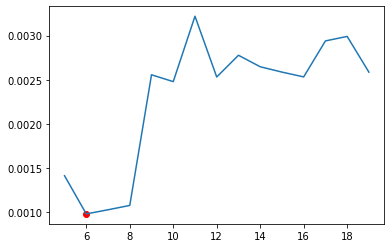

In [28]:
sizes_janelas = []
k_z = 2
data_3_10_e_3_11 = transformed_data["Stand"]["ACC"]

data_with_outliers = injeta_outliers(data=data_3_10_e_3_11, x_per=10, k=k_z, max_iter=10)

for i in range(5, 20):
    mean_square, errors = faz_otrespontodez(data_3_10_e_3_11, data_with_outliers, i, k_z)
    sizes_janelas.append(mean_square)
    
    print(" ------- Tamanho da janela: " +  str(i) + " ------- ")
    print("Erro quadrático: " + str(mean_square))
    
    
plt.figure()
plt.plot(range(5, 20), sizes_janelas)
plt.scatter(sizes_janelas.index(min(sizes_janelas)) + 5, min(sizes_janelas), color="red")
plt.show()

# TODO:
- Comparar graficamente o valor previsto com o real (scatter tipo booleans ou assim)

## Melhor valor para o tamanho de janela
<p>Sempre que corrermos o bloco acima, este vai dar sempre um novo valor ideal de tamanho de janela pois a injeção de outliers é sempre aleatória, fazendo variar conforme onde os 10% de outliers foram adicionados</p>

# 3.11

In [29]:
def faz_otrespontoonze(data, data_with_outliers, janela, k_z):
    _, find_outliers = z_score(data_with_outliers, k_z)  # Array dos indices dos outliers
    erros = []  # Menor erro para cada ordem (1 a 6)
    for outlier in find_outliers.index:  # Percorre os indices dos outliers
           # if outlier == janela:  # Indice 3 e janela 10 => apenas verifica estas condições
            
        train_array1 = list(data[outlier - janela // 2 : outlier])
        train_array2 = list(data[outlier + 1 : outlier + janela // 2 + 1])  # Janela para trás e janela para a frente
        if len(train_array1) != 0  and len(train_array2) != 0:
            new_values1 = []  # Para cada ordem, vai buscar o menor erro
            new_values2 = []  # Para cada ordem, vai buscar o menor erro
            #print(len(train_array1))
            for order in range(1, 7):
                
                new_values1.append(linearRegressionWithMultipleOrders(train_array1, janela // 2, order)[-1])  # Último valor é o estimado
                new_values2.append(linearRegressionWithMultipleOrders(train_array2[::-1], janela // 2, order)[-1])  # Último valor é o estimado (reverse do array pq é a simetria)

            new_values1 = np.array(new_values1)
            new_values2 = np.array(new_values2)

            new_values = (new_values1 + new_values2) / 2  # Média das duas metades

            new_error = min(pow((new_values - data[outlier]), 2))  # Erro quadrático

            erros.append(new_error)             
            
    return np.array(erros).mean() ** 2, np.array(erros)

 ------- Tamanho da janela: 5 ------- 
Erro quadrático: 2.716832120133323e-05
 ------- Tamanho da janela: 6 ------- 
Erro quadrático: 1.4044642202564606e-05
 ------- Tamanho da janela: 7 ------- 
Erro quadrático: 1.4044642202564606e-05
 ------- Tamanho da janela: 8 ------- 
Erro quadrático: 1.3249007541849003e-05
 ------- Tamanho da janela: 9 ------- 
Erro quadrático: 1.3249007541849003e-05
 ------- Tamanho da janela: 10 ------- 
Erro quadrático: 1.162186363248655e-05
 ------- Tamanho da janela: 11 ------- 
Erro quadrático: 1.162186363248655e-05
 ------- Tamanho da janela: 12 ------- 
Erro quadrático: 1.0573315496500185e-05
 ------- Tamanho da janela: 13 ------- 
Erro quadrático: 1.0573315496500185e-05
 ------- Tamanho da janela: 14 ------- 
Erro quadrático: 1.0369065924633047e-05
 ------- Tamanho da janela: 15 ------- 
Erro quadrático: 1.0369065924633047e-05
 ------- Tamanho da janela: 16 ------- 
Erro quadrático: 9.334407208844717e-06
 ------- Tamanho da janela: 17 ------- 
Erro quad

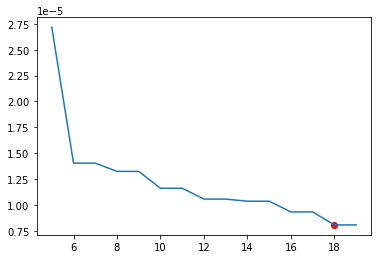

In [30]:
sizes_janelas = []
k_z = 2

for i in range(5, 20):
    mean_square, errors = faz_otrespontoonze(data_3_10_e_3_11, data_with_outliers, i, 2)
    sizes_janelas.append(mean_square)
    
    print(" ------- Tamanho da janela: " +  str(i) + " ------- ")
    print("Erro quadrático: " + str(mean_square))
    
    # print("Média do erro:", errors.mean())
    # print("Desvio padrao:", errors.std())
    
plt.figure()
plt.plot(range(5, 20), sizes_janelas)
plt.scatter(sizes_janelas.index(min(sizes_janelas)) + 5, min(sizes_janelas), color="red")
plt.show()

### Comparação
Com os resultados obtidos podemos considerar que blá blá blá
### tabela a comparar
### grafico todo pipi a compara

# Exercicio 4
## Tentar chegar à alinea 4.3 inclusive, este fim de semana

## 4.1
#### basicamente é extrair informação estatitica do modulo feito no 3.1
#### gaussianidade da distribuição usando, por exemplo, o teste Kolmogorov-Smirnov
Recomendam ver isto: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2881615/ 

## 4.2
### Artigo: https://pdfs.semanticscholar.org/8522/ce2bfce1ab65b133e411350478183e79fae7.pdf
- Ler o artigo e identificar o conjunto de features temporais e espectrais identificadas por estes autores
- Para cada feature deverá elaborar uma rotina para a respectiva extração
- Usando as rotinas elaboradas no item anterior, deverá escrever o código necessário para extrair o vetor de features em cada instante.

## 4.3 - PCA
#### Este artigo tem 6k claps, é legit de certeza: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 